# AUX_ISR_1B

> Abstract: Access to auxiliary ISR product

In [1]:
%load_ext watermark
%watermark -i -v -p viresclient,pandas,xarray,matplotlib

Python implementation: CPython
Python version       : 3.8.12
IPython version      : 7.22.0

viresclient: 0.9.1
pandas     : 1.2.4
xarray     : 0.17.0
matplotlib : 3.4.1



In [2]:
from viresclient import AeolusRequest
import datetime as dt
import matplotlib.pyplot as plt

request = AeolusRequest()

## Product information

Description of product.

Documentation:
- https://earth.esa.int/eogateway/catalog/aeolus-preliminary-hlos-horizontal-line-of-sight-wind-observations-for-rayleigh-and-mie-receivers


In [3]:


request.set_collection('AUX_ISR_1B')

request.set_fields(fields=[
    "time",
    "freq_mie_USR_closest_to_rayleigh_filter_centre",
    "frequency_rayleigh_filter_centre",
    "num_of_valid_mie_results",
    "num_of_valid_rayleigh_results",
    "laser_frequency_offset",
    "mie_valid",
    "rayleigh_valid",
    "fizeau_transmission",
    "mie_response",
    "rayleigh_channel_A_response",
    "rayleigh_channel_B_response",
    "num_of_raw_reference_pulses",
    "num_of_mie_reference_pulses",
    "num_of_rayleigh_reference_pulses",
    "accumulated_laser_energy_mie",
    "mean_laser_energy_mie",
    "accumulated_laser_energy_rayleigh",
    "mean_laser_energy_rayleigh",
    "laser_energy_drift",
    "downhill_simplex_used",
    "num_of_iterations_mie_core_1",
    "last_peak_difference_mie_core_1",
    "FWHM_mie_core_2",
    "num_of_iterations_mie_core_2",
    "downhill_simplex_quality_flag",
    "rayleigh_spectrometer_temperature_9",
    "rayleigh_spectrometer_temperature_10",
    "rayleigh_spectrometer_temperature_11",
    "rayleigh_thermal_hood_temperature_1",
    "rayleigh_thermal_hood_temperature_2",
    "rayleigh_thermal_hood_temperature_3",
    "rayleigh_thermal_hood_temperature_4",
    "rayleigh_optical_baseplate_avg_temperature"
])

data = request.get_between(
    start_time="2020-06-01T03:00:58Z",
    end_time="2020-06-01T03:30:22Z",
    filetype="nc",
    asynchronous=False
)

ds = data.as_xarray()



Downloading:   0%|          |  [ Elapsed: 00:00, Remaining: ? ] (0.182MB)

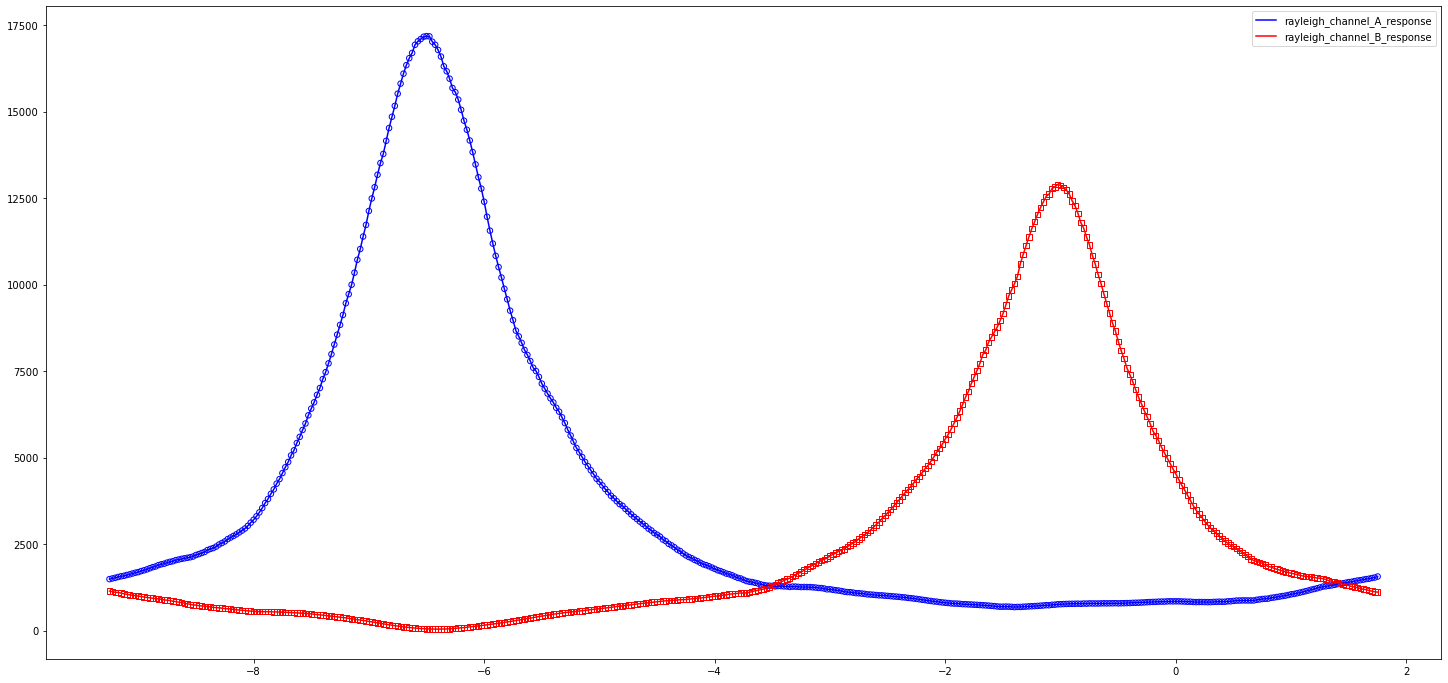

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

plt.rcParams["figure.figsize"] = (25,12)

fig, ax = plt.subplots()
ax.plot(
    ds.laser_frequency_offset.values,
    ds.rayleigh_channel_A_response.values,
    label="rayleigh_channel_A_response",
    color="b"
)
ax.scatter(
    ds.laser_frequency_offset.values,
    ds.rayleigh_channel_A_response.values,
    s=30, facecolors='none', edgecolors='b',
)

ax.plot(
    ds.laser_frequency_offset.values,
    ds.rayleigh_channel_B_response.values,
    label="rayleigh_channel_B_response",
    color="r"
)
ax.scatter(
    ds.laser_frequency_offset.values,
    ds.rayleigh_channel_B_response.values,
    s=30, facecolors='none', edgecolors='r', marker="s",
)
plt.legend()